# Introduction to Qiskit 🎉
### Qiskit is a python framework for the simulation of quantum algorithms

<center><div>
<img src="./images/qiskit.png" width="350"/>
</center></div>

In [1]:
%pip install qiskit qiskit-ibm-runtime qiskit_aer 'qiskit[visualization]'

Note: you may need to restart the kernel to use updated packages.


In [2]:
import qiskit
qiskit.__version__

'1.0.1'

In [3]:
from qiskit import QuantumCircuit, QuantumRegister

In [4]:
q = QuantumRegister(1, 'q')

quantum_circuit = QuantumCircuit(q)

In [5]:
from qiskit_aer import AerSimulator

In [7]:
simulator = AerSimulator()
result = simulator.run(quantum_circuit, shot=1024).result()
counts = result.get_counts()

QiskitError: 'No counts for experiment "0"'

### Why did qiskit raise the exception: QiskitError: 'No counts for experiment "0"'?

In [8]:
from qiskit import ClassicalRegister
from qiskit.visualization import plot_histogram

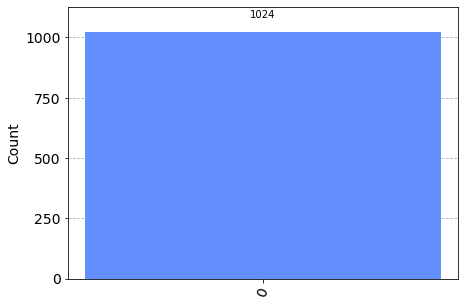

In [9]:
q = QuantumRegister(1, 'q')
cq = ClassicalRegister(len(q), 'cq')

quantum_circuit = QuantumCircuit(q, cq)

quantum_circuit.measure(q, cq)

#to execute the circuit
simulator = AerSimulator()
result = simulator.run(quantum_circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

### How can we visualize a circuit? 2 ways!
- But first, let's make the things interesting using quantum gates!

In [10]:
from qiskit.circuit.library import XGate

In [11]:
q = QuantumRegister(1, 'q')
cq = ClassicalRegister(len(q), 'cq')

quantum_circuit = QuantumCircuit(q, cq)

quantum_circuit.append(XGate(), q)

### 1) Matrix representation

In [12]:
from qiskit.quantum_info import Operator

operator = Operator(quantum_circuit)
matrix = operator.data
print(matrix)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


### 2) Circuit representation

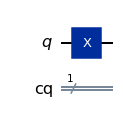

In [13]:
quantum_circuit.draw('mpl') #or quantum_circuit.draw()

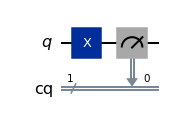

In [14]:
# Add a Measurement
quantum_circuit.measure(q, cq)

quantum_circuit.draw('mpl')

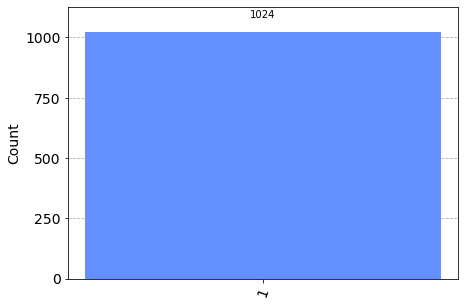

In [15]:
simulator = AerSimulator()
result = simulator.run(quantum_circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

## The statevector simulator 

In [16]:
from qiskit_aer import StatevectorSimulator

q = QuantumRegister(1, 'q')
cq = ClassicalRegister(len(q), 'cq')

quantum_circuit = QuantumCircuit(q, cq)

#quantum_circuit.append(XGate(), q)

simulator = StatevectorSimulator()
result = simulator.run(quantum_circuit).result()
statevector = result.get_statevector()

print(statevector)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


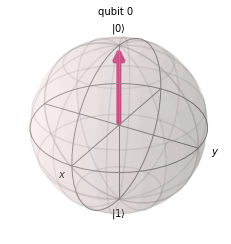

In [17]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(statevector)

# More qubits... ⚛️

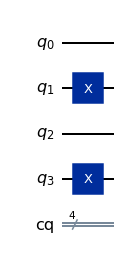

In [18]:
n_qubits = 4

q = QuantumRegister(n_qubits, 'q')
cq = ClassicalRegister(n_qubits, 'cq')

quantum_circuit = QuantumCircuit(q, cq)

quantum_circuit.append(XGate(), [q[1]])

quantum_circuit.append(XGate(), [q[3]])

quantum_circuit.draw('mpl')

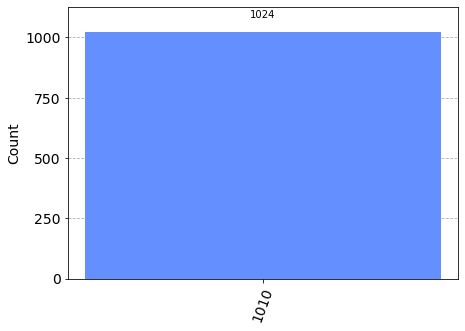

In [19]:
quantum_circuit.measure(q, cq)

simulator = AerSimulator()
result = simulator.run(quantum_circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

## Take away message: 

Qiskit combines the four quantum bits in the following order:

$$ q[3], q[2], q[1], q[0] .$$

Then, each outcome is read in the same order.

The outcome is a binary number, and so the first digit is expected to be the most significant bit and the last digit is expected to be the least significant bit.

For example, $ 13 =  \mathbf{1} \cdot 2^3 + \mathbf{1} \cdot 2^2 + \mathbf{0} \cdot 2^1 + \mathbf{1} \cdot 2^0 $, which is equal to $ \mathbf{1101} $ in binary.

In this case, $ c_q[3] = 1 $, $ c_q[2] = 1 $, $ c_q[1] = 0 $, and $ c_q[0] = 1$. 

# Controlled Gate! 👀¶


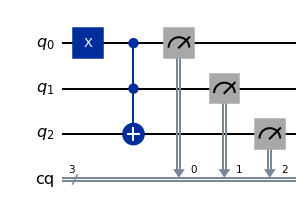

In [37]:
q = QuantumRegister(3, 'q')
cq = ClassicalRegister(3, 'cq')

quantum_circuit = QuantumCircuit(q, cq)

quantum_circuit.append(XGate(), [q[0]])

CXGate = XGate().control(2)
quantum_circuit.append(CXGate, [q[0], q[1], q[2]])


quantum_circuit.measure(q, cq)

quantum_circuit.draw()


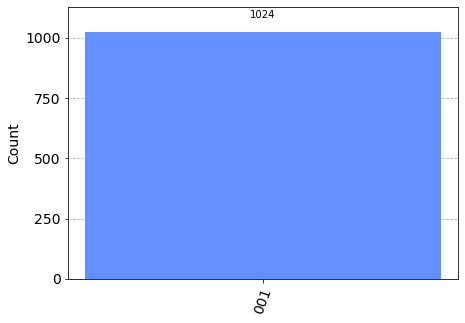

In [38]:
simulator = AerSimulator()  # Create a simulator backend
result = simulator.run(quantum_circuit, shots=1024).result()  # Run the circuit and get the result
counts = result.get_counts() 

plot_histogram(counts)

# <center> A wild H Gate appeared! 💥 </center>
<center><div>
<img src="./images/wildHGate.jpeg" width="350"/>
</center></div>

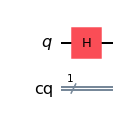

In [39]:
from qiskit.circuit.library import HGate

q = QuantumRegister(1, 'q')
cq = ClassicalRegister(1, 'cq')

quantum_circuit = QuantumCircuit(q, cq)

quantum_circuit.append(HGate(), q)

quantum_circuit.draw()

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


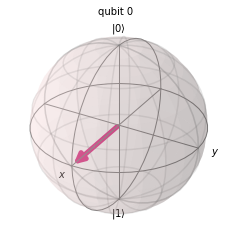

In [40]:
# ------ Get the statevector 
simulator = StatevectorSimulator()  # Create a simulator backend
result = simulator.run(quantum_circuit).result()  # Run the circuit and get the result
statevector = result.get_statevector() 

print(statevector)
plot_bloch_multivector(statevector)

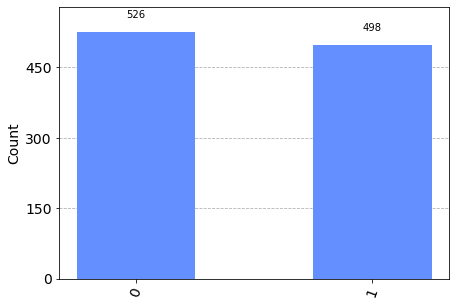

In [41]:
# ------ Get the distribution
quantum_circuit.measure(q, cq) 

simulator = AerSimulator()  # Create a simulator backend
result = simulator.run(quantum_circuit, shots=1024).result()  # Run the circuit and get the result
counts = result.get_counts()

plot_histogram(counts)

In [42]:
import numpy as np
from qiskit.circuit.library import RYGate
from qiskit.quantum_info import Statevector

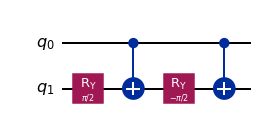

In [43]:
q = QuantumRegister(2, 'q')

quantum_circuit = QuantumCircuit(q)

CRYGate = RYGate(np.pi).control(1)
quantum_circuit.append(CRYGate, [q[0],q[1]])

quantum_circuit.decompose().draw()

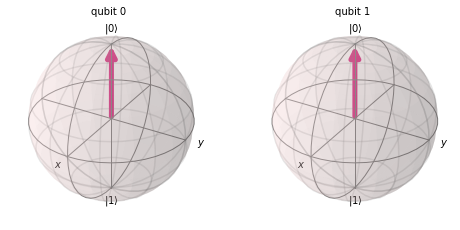

In [44]:
st = Statevector(quantum_circuit)
plot_bloch_multivector(st)

# Let's Entangle! Bell states

- The Bell's states  are specific quantum states of two qubits that represent the simplest examples of quantum entanglement. 

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

A quantum state $\ket{e}$ is entangled if there are no two states $\ket{\psi}, \ket{\phi}$ such that $\ket{\psi}\otimes\ket{\phi} = \ket{e}$

![display image](https://cdn-images-1.medium.com/v2/resize:fill:1600:480/gravity:fp:0.5:0.4/0*jYK3ugRdQGFYRCsY.gif)

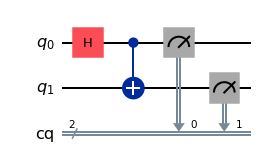

In [45]:
q = QuantumRegister(2, 'q')
cq = ClassicalRegister(2, 'cq')

quantum_circuit = QuantumCircuit(q,cq)

quantum_circuit.append(HGate(), [q[0]])
CXGate = XGate().control(1)
quantum_circuit.append(CXGate, [q[0],q[1]])
quantum_circuit.measure(q, cq)

quantum_circuit.draw()

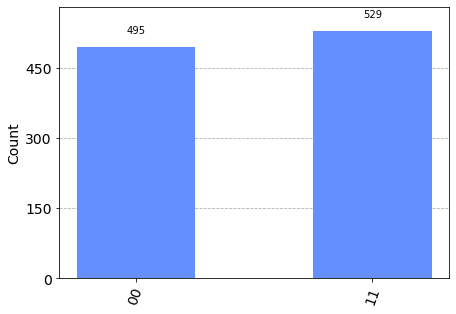

In [46]:

simulator = AerSimulator()
result = simulator.run(quantum_circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

# Let's do the same without Qiskit¶


In [47]:
I = np.eye(2, dtype=complex)

H = 1/np.sqrt(2)*np.ones([2,2], dtype=complex)
X = np.array([[0,1],[1,0]])

ket0 = np.array([[1],[0]]) # |0>
bra0 = np.conj(ket0.T) # <0|

ket1 = np.array([[0],[1]]) # |1>
bra1 = np.conj(ket1.T) # <1|

CX = np.kron(ket0 * bra0, I) + np.kron(ket1 * bra1, X)
print(CX)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [48]:
# Define a "Bell'state-maker unitary"

HxI = np.kron(H,I)
print(HxI)
bell_maker_unitary = CX.dot(HxI)

[[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
 [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]]


# <center> Let's run our quantum algorithm on a REAL quantum computer 🔥 </center>
<div>
<img src="./images/quantum_computer.jpg" width="1000"/>
</div>

In [49]:
#https://quantum-computing.ibm.com/

TOKEN = '8551206d0a50a352b3113bd26ca9d7d6dfdbae73048cdb4c54aa3820779173ed562b7455004343fd731af37b6084e6bc907f01b80c1d79113461672e40ae9625'

from qiskit import IBMQ

#IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

ImportError: cannot import name 'IBMQ' from 'qiskit' (/Users/alessandro/opt/anaconda3/lib/python3.9/site-packages/qiskit/__init__.py)

In [68]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>]

In [69]:
q = QuantumRegister(2, 'q')
cq = ClassicalRegister(2, 'cq')

quantum_circuit = QuantumCircuit(q,cq)

quantum_circuit.append(HGate(), [q[0]])
CXGate = XGate().control(1)
quantum_circuit.append(CXGate, [q[0],q[1]])
quantum_circuit.measure(q, cq)


In [70]:
real_device = service.backend("ibm_kyoto")

In [71]:
job = real_device.run(quantum_circuit)
print(job.job_id())

cqndz14c8df0008b4pgg


In [72]:
print(job.status())

JobStatus.QUEUED


In [73]:
print(job.usage_estimation)

{'quantum_seconds': 17.198632677023173}
